In [1]:
import math
from datetime import timedelta, datetime
from operator import attrgetter

import matplotlib.pyplot as plt
import numpy as np
import trajan as ta
import xarray as xr
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

import os
# from salishsea_tools import nc_tools, places

import cmocean.cm as cm
import copy


In [2]:
bathy = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid/bathymetry_202108.nc')
print (bathy.nav_lat[445, 302].values, bathy.nav_lon[445, 302].values)
print (bathy.nav_lat[445, 304].values, bathy.nav_lon[445, 304].values)
ioutfall, joutfall = 445, 304
print (bathy.Bathymetry[ioutfall, joutfall].values)
mesh = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc')
print (mesh.mbathy[0, ioutfall, joutfall].values)
print (mesh.gdepw_0[0, 26, ioutfall, joutfall].values)

cm_deep = copy.copy(cm.deep)
cm_deep.set_bad('k')

49.1912727355957 -123.31233978271484
49.195045471191406 -123.30195617675781
85.375
26
85.375


In [3]:
bottom_depth = mesh.gdepw_0[0, 26, ioutfall, joutfall].values

In [25]:
# data = xr.open_dataset("/ocean/gwatts/home/analysis-grace/runs/depDays/passive_particles_for_1-8-2024_run_30_days_1.0.zarr")
# data = xr.open_dataset("/ocean/gwatts/home/analysis-grace/runs/config_test/passive_particles_for_1-4-2024_run_5_days_1.0.zarr")
data = xr.open_dataset('/ocean/gwatts/home/analysis-grace/runs/tidal_runs/passive_particles_for_20-1-2025_run_7_days_130m.zarr')
nobs = data.obs.shape[0]
ntraj = data.trajectory.shape[0]
print (nobs, ntraj)

168 168


/tmp/ipykernel_3847636/2391815182.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep)


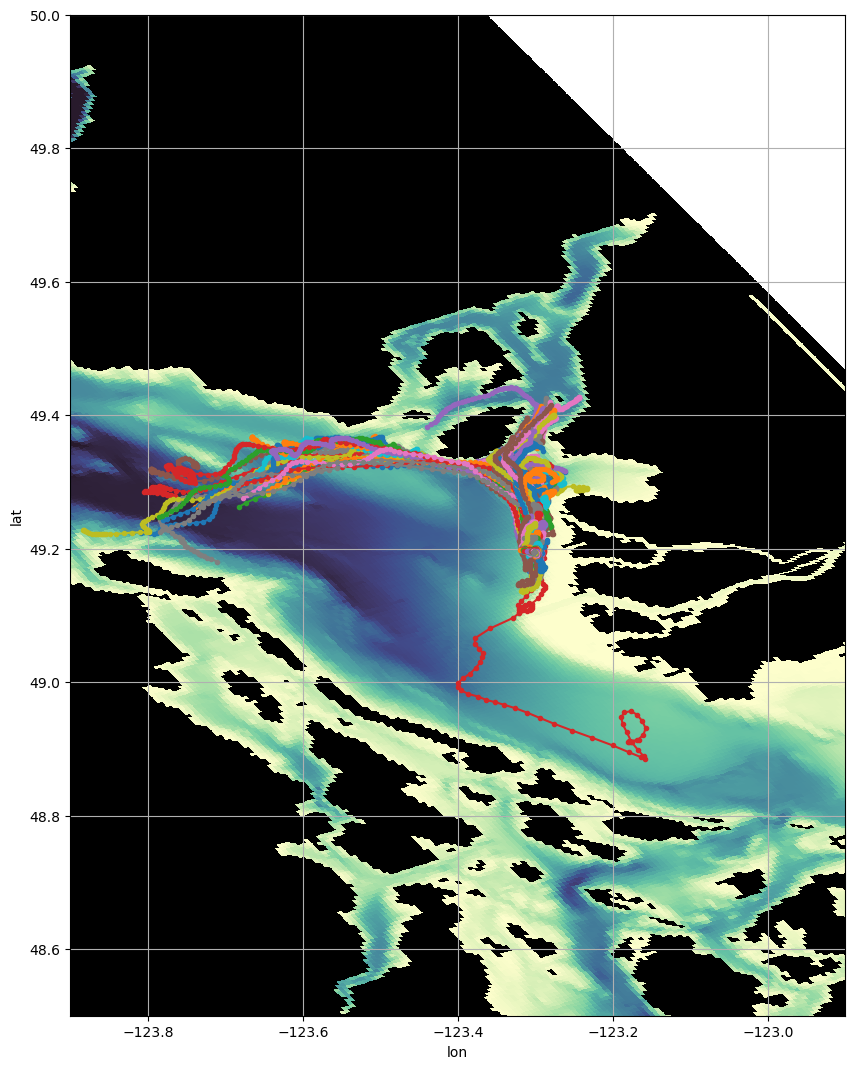

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 13))
ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep)
ax.set_xlim(-123.9, -122.9)
ax.set_ylim(48.5, 50);
# 
for ii in range(ntraj):
    y = data.lat[ii]
    x = data.lon[ii]
    ax.plot(x, y, '.-')
# ax.plot(data.lat[0,0], data.lon[0,0], 'o')
ax.set_ylabel('lat')
ax.set_xlabel('lon')
ax.grid();

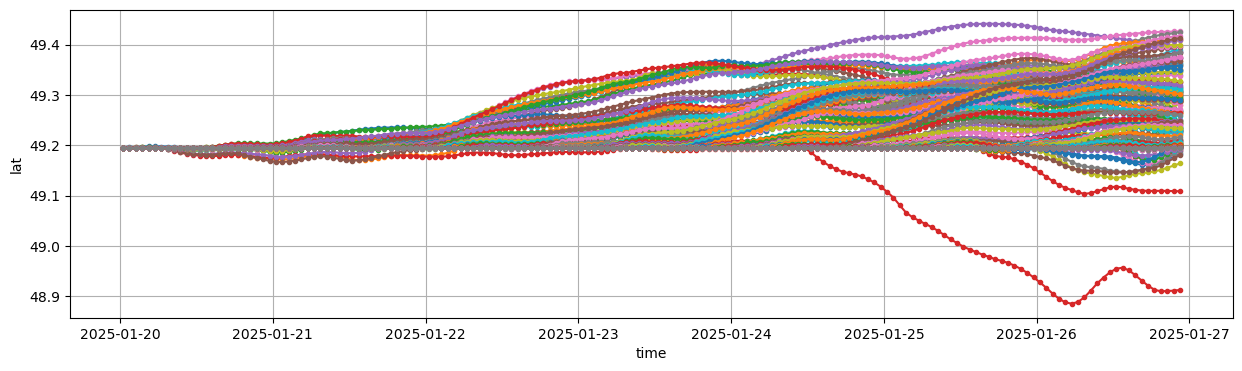

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
tend = -1
for ii in range(ntraj):
    y = data.lat[ii, :tend]
    x = data.time[ii, :tend]
    ax.plot(x, y, '.-')
ax.set_ylabel('lat')
ax.set_xlabel('time')
ax.grid();

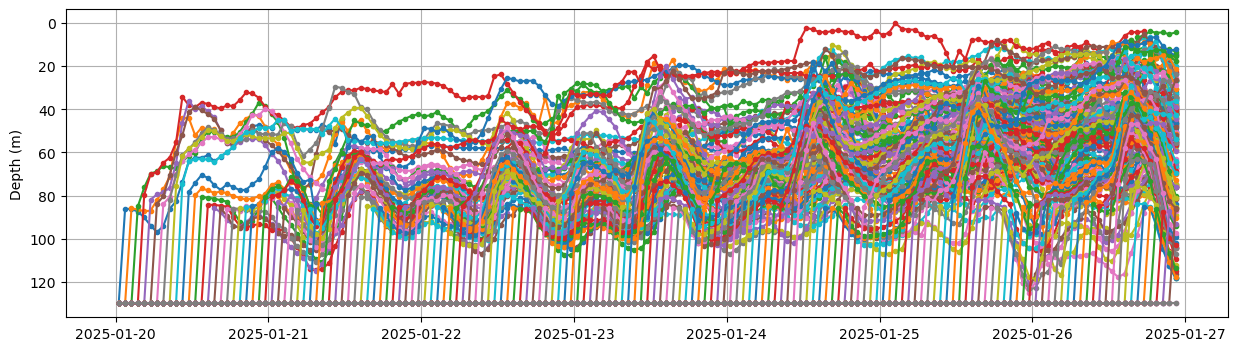

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
for ii in range(ntraj):
    y = data.z[ii, :tend]
    x = data.time[ii, :tend]
    ax.plot(x, y, '.-')
ax.invert_yaxis()
ax.set_ylabel('Depth (m)')
ax.grid();

In [4]:
d = [50., 70., 100., 130., 160.]
np.repeat(d, 30/len(d))

array([ 50.,  50.,  50.,  50.,  50.,  50.,  70.,  70.,  70.,  70.,  70.,
        70., 100., 100., 100., 100., 100., 100., 130., 130., 130., 130.,
       130., 130., 160., 160., 160., 160., 160., 160.])